# Review of scikit-learn API

# Exercise

Load the dataset ``data/bank-campaign.csv`` (you can find a description in data/bank-campaign-desc.txt).

This dataset is success of marketing a telephone bank marketing campaign. The goal is to predict the binary outcome "target", which is whether a client subscribed to a new product.

Split the data into a training and a test set using ``train_test_split``.
Use cross-validation to evaluate a RandomForestClassifier on the training part.
Then use ``GridSearchCV`` to adjust the parameters ``max_features`` and ``max_depth``.
Create a heat-map with the cross-validation results for the whole grid.

Bonus: Also plot the influence of ``max_depth`` on runtime.

In [ ]:
# %load solutions/bank_campaign.py

In [35]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# load data
df = pd.read_csv('data/bank-campaign.csv')
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,no


In [10]:
# check if there is missing data (NaN values)
df[df.isnull()].count()

# we can see that there aren't any NaN values...

age                      0
duration                 0
campaign                 0
pdays                    0
previous                 0
emp.var.rate             0
cons.price.idx           0
cons.conf.idx            0
euribor3m                0
nr.employed              0
job_admin.               0
job_blue-collar          0
job_entrepreneur         0
job_housemaid            0
job_management           0
job_retired              0
job_self-employed        0
job_services             0
job_student              0
job_technician           0
job_unemployed           0
job_unknown              0
marital_divorced         0
marital_married          0
marital_single           0
marital_unknown          0
education_basic.4y       0
education_basic.6y       0
education_basic.9y       0
education_high.school    0
                        ..
default_no               0
default_unknown          0
default_yes              0
housing_no               0
housing_unknown          0
housing_yes              0
l

In [11]:
# create X and y arrays
X = df.drop('target', axis=1)
y = df['target']

In [13]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=101)

In [23]:
# create and train model
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
print('Accuracy without preprocessing and cross validation')
print('\tTraining data accuracy: {}'.format(forest.score(X_train, y_train)))
print('\tTest data accuracy: {}'.format(forest.score(X_test, y_test)))

Accuracy without preprocessing and cross validation
	Training data accuracy: 1.0
	Test data accuracy: 0.909876663105759


In [22]:
# cross validation
res = cross_val_score(RandomForestClassifier(n_estimators=100), X_train, y_train, cv=10)
res

array([0.9171521 , 0.91226934, 0.9106507 , 0.91550664, 0.91324053,
       0.91226934, 0.9074134 , 0.91388799, 0.91680155, 0.91421172])

In [29]:
# find best values for parameters max_features and max_depth with GridSearchCV
param_grid = {'max_features': [4, 8, 16, 20, 25, 40],
              'max_depth': [3, 5, 8, 10, 15, 20, 30]}

grid = GridSearchCV(RandomForestClassifier(n_estimators=100), param_grid, cv=10)

In [31]:
# train model with optimal parameters (grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='

In [37]:
print('Accuracy with optimal parameters (grid search)')
print('\tTraining data accuracy: {}'.format(grid.score(X_train, y_train)))
print('\tTest data accuracy: {}'.format(grid.score(X_test, y_test)))

Accuracy with optimal parameters (grid search)
	Training data accuracy: 0.9351591078307597
	Test data accuracy: 0.9163834126444595


In [34]:
# let model make predictions
predictions = grid.predict(X_test)

In [36]:
# metrics
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[8779  358]
 [ 503  657]]
              precision    recall  f1-score   support

          no       0.95      0.96      0.95      9137
         yes       0.65      0.57      0.60      1160

    accuracy                           0.92     10297
   macro avg       0.80      0.76      0.78     10297
weighted avg       0.91      0.92      0.91     10297



In [32]:
res = pd.DataFrame(grid.cv_results_)
print(res.keys())
res_piv = pd.pivot_table(
    res, values='mean_test_score', index='param_max_depth',
    columns='param_max_features')

display(res_piv)


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


param_max_features,4,8,16,20,25,40
param_max_depth,,,,,,
3,0.888576,0.900813,0.902140,0.903014,0.903920,0.906704
5,0.900877,0.902625,0.906510,0.908258,0.911528,0.916157
8,0.902172,0.907708,0.915283,0.916837,0.916901,0.917840
10,0.904244,0.910556,0.915898,0.916934,0.917581,0.917225
15,0.907546,0.913179,0.916740,0.915639,0.915930,0.914862
20,0.908647,0.912531,0.913794,0.914862,0.913761,0.913664
30,0.909294,0.913340,0.913891,0.914053,0.913438,0.913988


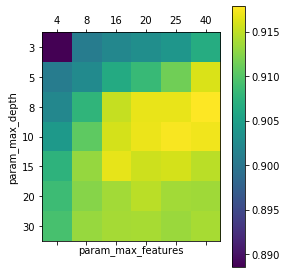

In [38]:
plt.matshow(res_piv.values)
plt.xlabel(res_piv.columns.name)
plt.xticks(range(res_piv.shape[1]), res_piv.columns)
plt.ylabel(res_piv.index.name)
plt.yticks(range(res_piv.shape[0]), res_piv.index);
plt.colorbar()